# HOUSING: PRICE PREDICTION(Surprise Housing)

# Problem Gist:
    
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the worlds economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modeling, Market mix modeling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the .CSV file below. The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

1-Which variables are important to predict the price of variable? 2-How do these variables describe the price of the house?

# Problem Definition.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Technical Requirements:
    
1-Data contains 1460 entries each having 81 variables.

2-Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

3-Extensive EDA has to be performed to gain relationships of important variable and price.

4-Data contains numerical as well as categorical variable. You need to handle them accordingly.

5-You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

6-You need to find important features which affect the price positively or negatively.

7-Two datasets

# We will start our Analysis in importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [4]:
df_Train=pd.read_csv('https://raw.githubusercontent.com/MadhurimaSrivastava/Housing-prediction-project/main/train.csv')
df_Train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [5]:
df_Test=pd.read_csv("https://raw.githubusercontent.com/MadhurimaSrivastava/Housing-prediction-project/main/test.csv")
df_Test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
8,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,396,0,NaN,NaN,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal


In [29]:
df_Train.shape

(1168, 81)

In [30]:
df_Test.shape

(292, 80)

In [31]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [33]:
df_Train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [35]:
df_Test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

we have seen same trend of missing val in the test data also. there are 17 cols which are having null value. There are some col which has above 90% missing value. we will drop those columns which are having high count of null values

<AxesSubplot:title={'center':'Heatmap of missing values'}>

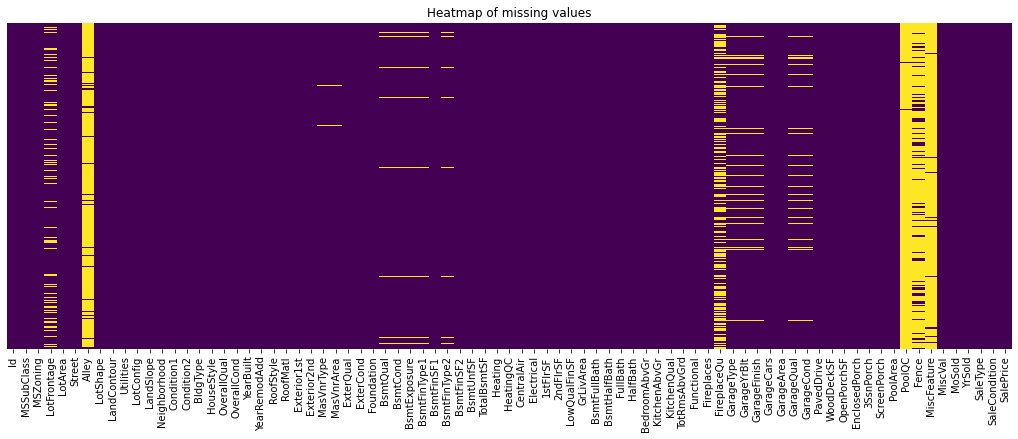

In [45]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(df_Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df_Train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_Test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


In [36]:
# let check the value of categorical variables
train_cat_var = df_Train.select_dtypes(include = "object")
test_cat_var = df_Test.select_dtypes(include = "object" )

In [37]:
def cat_value(x):
    for i in x.columns:
        print("variable name",i,"\n")
        print(x[i].value_counts(),"\n")

In [38]:

cat_value(train_cat_var)

variable name MSZoning 

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64 

variable name Street 

Pave    1164
Grvl       4
Name: Street, dtype: int64 

variable name Alley 

Grvl    41
Pave    36
Name: Alley, dtype: int64 

variable name LotShape 

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64 

variable name LandContour 

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64 

variable name Utilities 

AllPub    1168
Name: Utilities, dtype: int64 

variable name LotConfig 

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64 

variable name LandSlope 

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64 

variable name Neighborhood 

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45


Minimum Categories in the features is 1 and maximum are 26 in the. All object types columns are categorical columns, so we will change their dtypes

In [41]:
# let check the numerical columns 
train_num_var = df_Train.select_dtypes(include = ["int64","float64"])
test_num_var = df_Test.select_dtypes(include =["int64","float64"] )

In [42]:
# checking some statistical value of the data
train_num_var.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Observation

some of the category columns are already lebelled one like Overallquality col category columns andis already labelled

Min plot size is 1300 sqft and maximum is 164660 sqft

The oldest house in the dataset is 145 years old and the latest one is 10 years old

building which doesnt have second floor, those value marked as 0 in the data in 2ndFlrSF col

In [43]:
# checking some statistical value of the test data
test_num_var.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

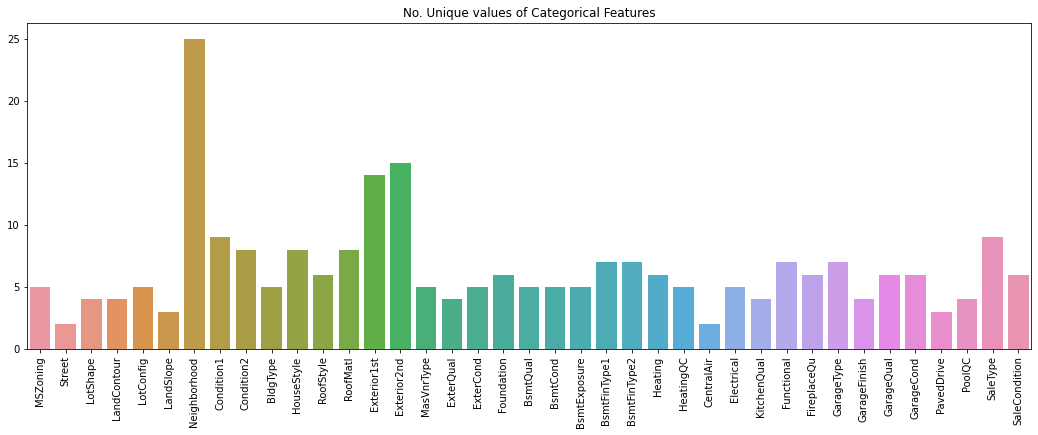

In [46]:
unique_values = []
for col in object_cols:
  unique_values.append(df_Train[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

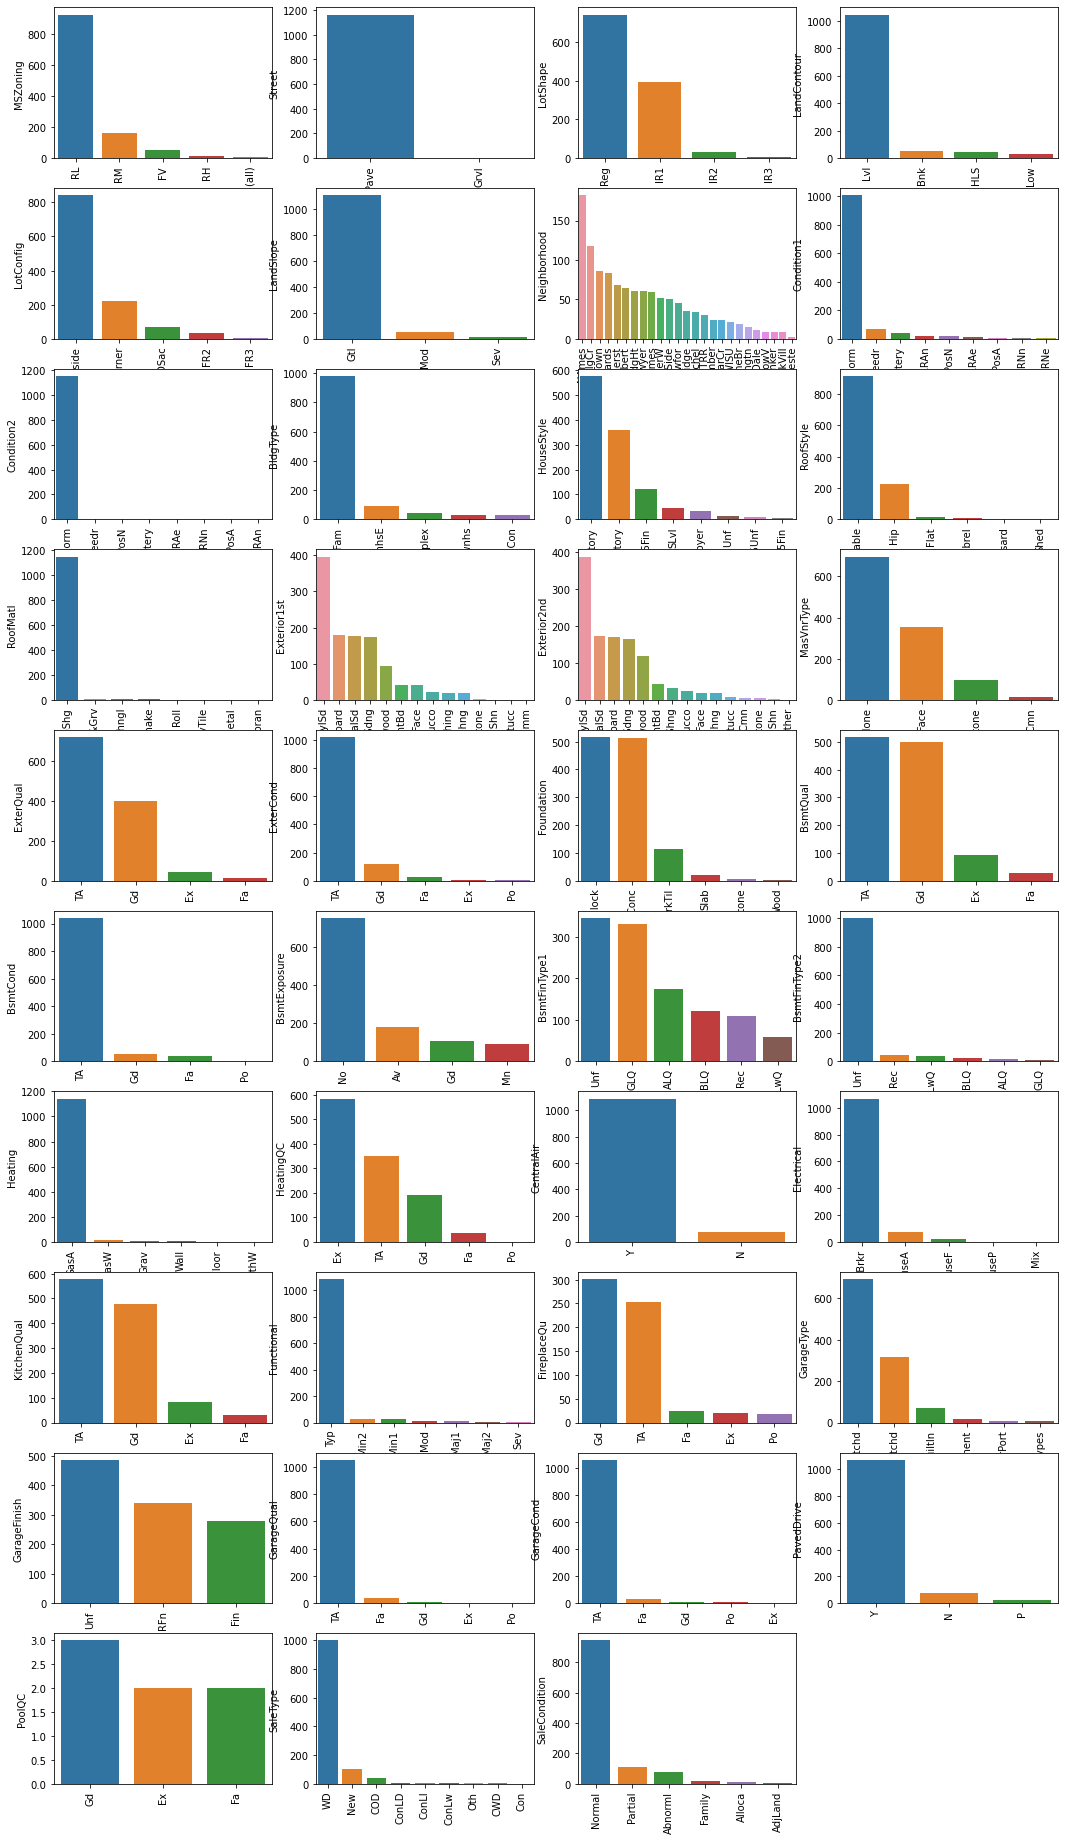

In [47]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
  y = df_Train[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

# Display Sale price of distribution by categorical variables in boxplot

Based on the type of sale, houses that were just constructed and sold were sold at a higher price. Houses having contract of sales with low down payment, low interest or both had relatively lower sale price range. The characteristics that causes the price of houses to be higher are as described below:-

1-Houses with irregular lots

2-Houses that are at the hillside rather than near the bank

3 -Houses with fronage on the sides of property and at cul de sac

4-Houses that were near the positive off-site feature such as park and greenbelt

5-Double story houses

6-Single-family Detached and Townhouse End Unit

7-Houses with roofs made of Wood shake

8-Exterior covered with cement board

9-Houses with Stone masvnrtype

10-Houses with builtin garage

11-Houses with Standard Circuit Breakers & Romex

12-Houses with paved or partially paved road

# Fill up missing values:

In [48]:
# i am dropping ID and Utilities columns from the training and test dataset because they are not relevant col
df_Train.drop(columns =["Id","Utilities"], axis =1, inplace = True)
df_Test.drop(columns =["Id","Utilities"], axis =1, inplace = True)

In [49]:
df_Train.drop(columns =["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis =1, inplace = True)
df_Test.drop(columns =["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"], axis =1, inplace = True)

In [50]:
# checking shape of the data after a few columns deleted 
df_Train.shape

(1168, 74)

In [51]:
df_Test.shape

(292, 73)

In [52]:
"""We have LotFrontage col and it has 18% missing value,since it is an important feature i am not dropping it instead 
imputing with median. We have another col also which GarageYrBlt and it has missing value which is being filled with yearbuilt 
coressposning value"""

#filling missing value with yearbuilt corresponsing value
df_Train["GarageYrBlt"].fillna(df_Train["YearBuilt"],inplace = True) #filling training value
df_Test["GarageYrBlt"].fillna(df_Test["YearBuilt"],inplace = True) #filling test value

# # filling LotFrontage col with its median value

df_Train["LotFrontage"].fillna(df_Train["LotFrontage"].median(),inplace = True)  #filling training value
df_Test["LotFrontage"].fillna(df_Test["LotFrontage"].median(),inplace = True)  #filling test value


# imputing  MasVnrArea and MasVnrType with median and mode respectively 
df_Train["MasVnrArea"].fillna(df_Train["MasVnrArea"].median(),inplace = True)  #filling training value
df_Test["MasVnrArea"].fillna(df_Test["MasVnrArea"].median(),inplace = True)  #filling test value


df_Train["MasVnrType"].fillna(df_Train["MasVnrType"].mode()[0],inplace = True)  #filling training value
df_Test["MasVnrType"].fillna(df_Test["MasVnrType"].mode()[0],inplace = True)  #filling test value

In [53]:
# creating category list of col and saving into this cat_col
cat_col = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","GarageQual","GarageCond"]
for i in cat_col:
    df_Train[i] = df_Train[i].fillna(df_Train[i].mode()[0])  
    
for j in cat_col:
    df_Test[j] = df_Test[j].fillna(df_Test[j].mode()[0])  

All the missing values have been imputed from trainig and test data but there a columns in test dataset which is Electrical, it has no missing value in training set bt we have a one missing value observation in test data, so we will impute it with mode value

In [54]:
df_Test.Electrical.isnull().sum()

1

In [55]:
df_Test["Electrical"] = df_Test["Electrical"].fillna(df_Test["Electrical"].mode()[0])  

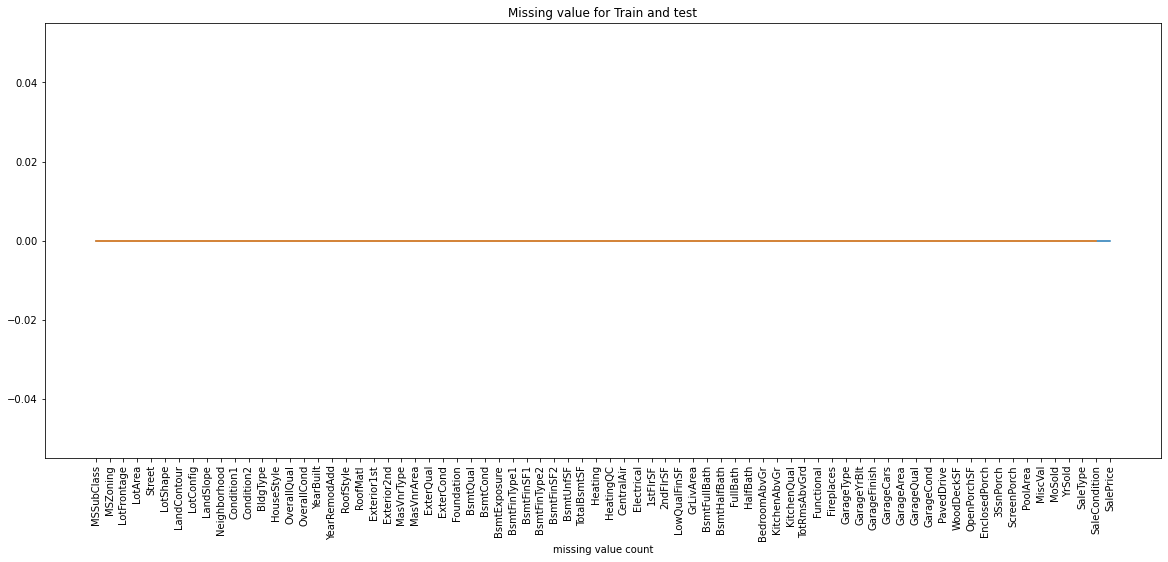

In [56]:
# Visualizing missing value
df_Train.isnull().sum().plot(figsize = (20,8))
df_Test.isnull().sum().plot(figsize = (20,8))
plt.title("Missing value for Train and test")
plt.xlabel("missing value count")
plt.xticks(np.arange(len(df_Train.columns)),df_Train.columns, rotation = "vertical");

# All the missing values have been filled, now we will further move to check the outliers in the dataset.

In [57]:
# Checking the distrbution of the numerical cols.

Numerical_col = df_Train.loc[:,["MSSubClass","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea",
                "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold",
                "SalePrice"]]


Numerical_col_test = df_Test.loc[:,["MSSubClass","LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea",
                "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold"]]

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


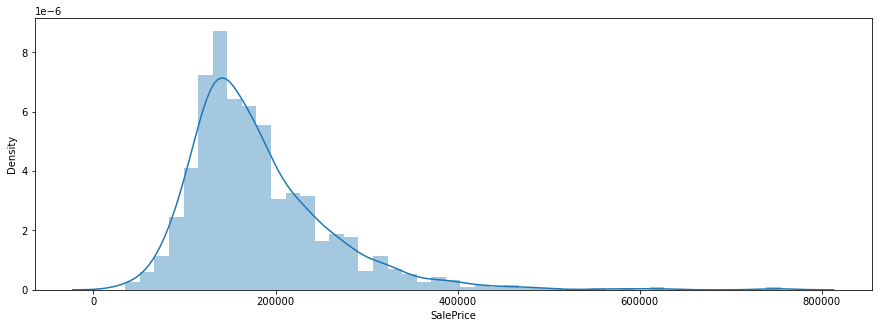

In [58]:
# Checking target col distribution
plt.figure(figsize=(15,5))
sns.distplot(df_Train["SalePrice"]);

Target column in right skewed

Most of the sales price are below 400000

# Detection Outliers

In [63]:
import warnings as war
war.filterwarnings("ignore")
pd.set_option("max_rows",100)
pd.set_option("max_columns",150)
pd.set_option("display.precision",2)
pd.set_option('display.float_format', '{:.3f}'.format)
from scipy.stats import boxcox
from sklearn.model_selection import  GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [59]:
# creTED METHOD TO DRAW BOXPLOT 
def outlier_detection(data,variable):
    plt.figure(figsize=(8,4))
    sns.boxplot(data[variable])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


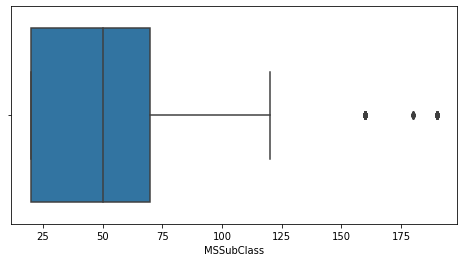

In [61]:
outlier_detection(df_Train,"MSSubClass")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


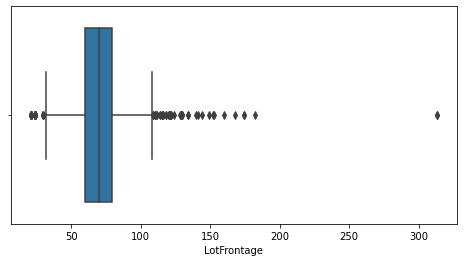

In [62]:
outlier_detection(df_Train,"LotFrontage")

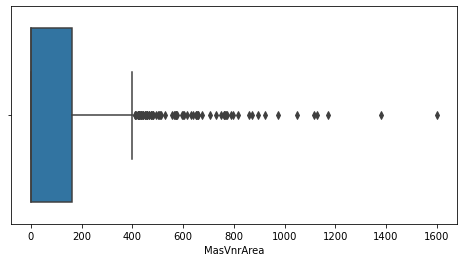

In [64]:
outlier_detection(df_Train,"MasVnrArea")

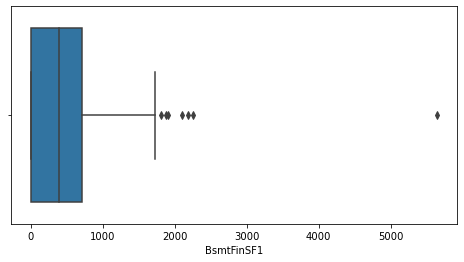

In [65]:
outlier_detection(df_Train,"BsmtFinSF1")

This col is good to go

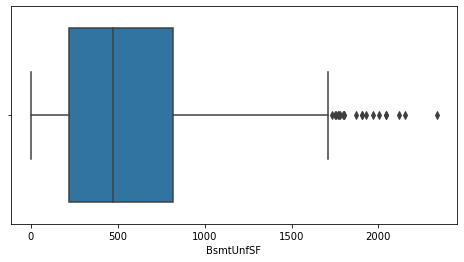

In [66]:
outlier_detection(df_Train,"BsmtUnfSF")

# Observations:

I have seen couple of columns outlier status and i have found that a few of these columns have extreme values but those are very close of upper whisker. 

A few of the cols have more extreme values but looking at the nature of those cols it is possible to have them in the data because area is very important field in this data.

Now we are moving further for some feature engineering

# Feature Engineering

In [67]:
# we have some year columns, i will convert them into years
# changing training set  
df_Train["YearBuilt"] = 2020 - df_Train["YearBuilt"]
df_Train["YearRemodAdd"] = 2020 - df_Train["YearRemodAdd"]
df_Train["GarageYrBlt"] = 2020 - df_Train["GarageYrBlt"]
df_Train["YrSold"] = 2020 - df_Train["YrSold"]

# Changing the test set
df_Test["YearBuilt"] = 2020 - df_Test["YearBuilt"]
df_Test["YearRemodAdd"] = 2020 - df_Test["YearRemodAdd"]
df_Test["GarageYrBlt"] = 2020 - df_Test["GarageYrBlt"]
df_Test["YrSold"] = 2020 - df_Test["YrSold"]

We have completed the features engineering task

# Label Encoding

In [68]:
# we have several categoical variable, lets convert them and encode them, we will use cat.codes codes to convert them

# updated the seprated object col lit
train_cat_var = df_Train.select_dtypes(include = "object")
test_cat_var = df_Test.select_dtypes(include = "object" )

train_cat_var.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
# before applying encoding , i want to keep data as it is for EDA thus creating copy of the data
EDA_purpose = df_Train.copy()

In [70]:
# Method to convert cols to catrgorical type and their value to category 
def convert_to_category(data,cat_col):
    for cols in cat_col.columns:
        data[cols] =  data[cols].astype("category").cat.codes

In [72]:
# converting train & test data's object cols to category
convert_to_category(df_Train,train_cat_var)
convert_to_category(df_Test,test_cat_var)

In [73]:
df_Train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.000,4928,1,0,3,4,0,13,2,2,4,2,6,5,44,44,1,1,8,9,2,0.000,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,1,43.000,1,2,440,4,4,2,0,205,0,0,0,0,0,2,13,8,4,128000
1,20,3,95.000,15865,1,0,3,4,1,12,2,2,0,2,8,6,50,50,0,5,12,13,2,0.000,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,1,50.000,2,2,621,4,4,2,81,207,0,0,224,0,0,10,13,8,4,268000
2,60,3,92.000,9920,1,0,3,1,0,15,2,2,0,5,7,5,24,23,1,1,7,7,2,0.000,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,1,23.000,2,2,455,4,4,2,180,130,0,0,0,0,0,6,13,8,4,269790
3,20,3,105.000,11751,1,0,3,4,0,14,2,2,0,2,6,6,43,43,3,1,8,9,1,480.000,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,1,43.000,1,2,546,4,4,2,0,122,0,0,0,0,0,1,10,0,4,190000
4,20,3,70.000,16635,1,0,3,2,0,14,2,2,0,2,6,7,43,20,1,1,4,4,3,126.000,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,1,43.000,0,2,529,4,4,2,240,0,0,0,0,0,0,6,11,8,4,215000


In [76]:
# we are calculating the property zone wise property areas and its price 
ms_zone_price = EDA_purpose.groupby("MSZoning")[["LotArea","SalePrice"]].median()
ms_zone_price

,LotArea,SalePrice
MSZoning,,
C (all),8712.000,81000.000
FV,7449.500,202925.000
RH,7468.000,136500.000
RL,10000.000,174000.000
RM,6120.000,124000.000


In [77]:
# calculating per square feet area's price 
ms_zone_price["SalePrice"]/ ms_zone_price["LotArea"]

MSZoning
C (all)    9.298
FV        27.240
RH        18.278
RL        17.400
RM        20.261
dtype: float64

Floating village residential category price is high as compared to other category, as per the definition, is a special area where a retirement community was developed and have the highest median price. 31.73 square per feet
people loves peace but it is not the case with everyone,some people love to live in low density areas and some love to live in high density area. high density area, i am assuming that everything which is necesarry for daily life is easily available as compared to low density area and prices are also define accordinlgy, by nature if everything is acceaable easily prices will be high for that place. we can see the same affect here in data as well. Average RH price per square feet is 18.27 and for RL is 17.40 per square feet. we see that RM price is high as compared to RH considering several factor like easy access to things, low noice population, low air population, less crowd etc.

In [78]:
# what type of road homes have and how price affect that 
EDA_purpose.groupby("Street")["SalePrice"].mean()

Street
Grvl   121110.750
Pave   181684.450
Name: SalePrice, dtype: float64

Sicne paved road looks more durabale as compared to gravel road and if properly is on side of that road and any society has access to it, prices would definately going to be high and we can see the same here as well in the data

In [79]:
# Checking the shape of the property because that also affect the price, let see how does it really affact.

Lot_shape = EDA_purpose.groupby(["LotShape","LandContour"])["LotArea","SalePrice"].median()
Lot_shape

LotArea  SalePrice
LotShape LandContour                     
IR1      Bnk         10120.000 159500.000
         HLS         11207.000 228950.000
         Low         14364.000 224000.000
         Lvl         10603.000 188000.000
IR2      Bnk         25050.000 199717.000
         HLS         24761.000 208500.000
         Low         71923.500 231000.000
         Lvl         12999.500 204000.000
IR3      Bnk         63887.000 160000.000
         HLS         23257.000 274725.000
         Low         16196.000 215000.000
         Lvl         16226.000 259000.000
Reg      Bnk          8331.500 132000.000
         HLS          7658.000 133625.000
         Low         11070.000 131000.000
         Lvl          8952.000 148250.000

In [80]:
Lot_shape["SalePrice"]/Lot_shape["LotArea"] 

LotShape  LandContour
IR1       Bnk           15.761
          HLS           20.429
          Low           15.595
          Lvl           17.731
IR2       Bnk            7.973
          HLS            8.420
          Low            3.212
          Lvl           15.693
IR3       Bnk            2.504
          HLS           11.813
          Low           13.275
          Lvl           15.962
Reg       Bnk           15.843
          HLS           17.449
          Low           11.834
          Lvl           16.561
dtype: float64

i tried comparing land shape and their level of flatness and checking the price. i have found that regular share and slighly irregular shape are liked and thier prices are also high.

In [81]:
# Lets check the lot configuration wise price, it shows the confugration of the housees or property that how they are accessible from the road.
LotConfig_ = EDA_purpose.groupby("LotConfig")["LotArea","SalePrice"].median()
LotConfig_

,LotArea,SalePrice
LotConfig,,
Corner,10391.000,161000.000
CulDSac,12772.000,211000.000
FR2,10500.000,160000.000
FR3,11446.000,221500.000
Inside,9120.000,160000.000


In [82]:
# LotConfig wise per suqare feet price 
LotConfig_["SalePrice"]/LotConfig_["LotArea"] 

LotConfig
Corner    15.494
CulDSac   16.521
FR2       15.238
FR3       19.352
Inside    17.544
dtype: float64

One thing is very clear that if property has multiple access to the road/street, its value will be more as compared to other and we can see the same from the data as well FR3

Inside lot is followed by FR3, i am assuming that it is more safe thus prices are higher

property which has end at one side of the road those sort of property also affect the price

In [83]:
# We are going to check the property price are affecting by neighbors

Neighborhood= EDA_purpose.groupby("Neighborhood")["LotArea","SalePrice"].median()

# calculating the per square feet price 
Neighborhood["SalePrice"]/Neighborhood["LotArea"]

Neighborhood
Blmngtn   59.762
Blueste   84.615
BrDale    63.095
BrkSide   19.311
ClearCr   13.888
CollgCr   21.267
Crawfor   17.545
Edwards   13.740
Gilbert   17.685
IDOTRR    12.946
MeadowV   44.180
Mitchel   15.508
NAmes     14.660
NPkVill   45.623
NWAmes    17.071
NoRidge   24.748
NridgHt   26.921
OldTown   14.682
SWISU     16.607
Sawyer    14.127
SawyerW   19.309
Somerst   26.663
StoneBr   42.359
Timber    17.366
Veenker   21.822
dtype: float64

we can see that there a few neighborhood and price are high for their nearby areas. like Blmgtn,Blueste ,BrDale, MeadowV. which means neighborhood matters

In [85]:
# HouseStyle wise property price 
EDA_purpose.groupby("HouseStyle")["LotArea","SalePrice"].median()

,LotArea,SalePrice
HouseStyle,,
1.5Fin,8741.000,131000.000
1.5Unf,6803.500,115500.000
1Story,9457.000,155000.000
2.5Fin,10896.000,191000.000
2.5Unf,8850.000,131700.000
2Story,9900.000,194500.000
SFoyer,8119.000,136480.000
SLvl,10192.000,168500.000


ANalysis says that 2 story property price is higher than others followed by 2.5 fin property

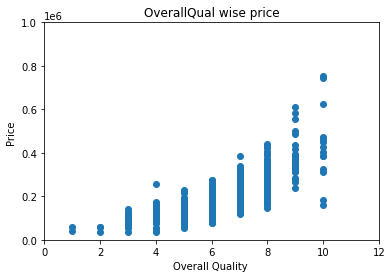

In [86]:
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.scatter(x = EDA_purpose["OverallQual"], y =EDA_purpose["SalePrice"])
plt.xlim(0,12,1)
plt.ylim(0,1000000)
plt.xlabel("Overall Quality ")
plt.ylabel("Price ")
plt.title("OverallQual wise price");

we can see that price are varing as per the overall quality of matiral used for building it. it depends on the lot also and we see that it has gone to $800000 . Same way we will check the overall condition of the house and relate with price

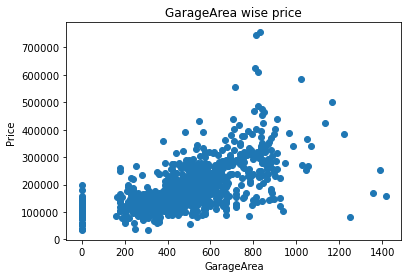

In [87]:
# let see how garageArea impact the saleprice
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.scatter(x = EDA_purpose["GarageArea"], y =EDA_purpose["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("Price ")
plt.title("GarageArea wise price");

we can see increaring trend in price by increasing the garage area, ofcourse lotArea matters a lot. Garage is also an important compotant people look for while purchasing home.

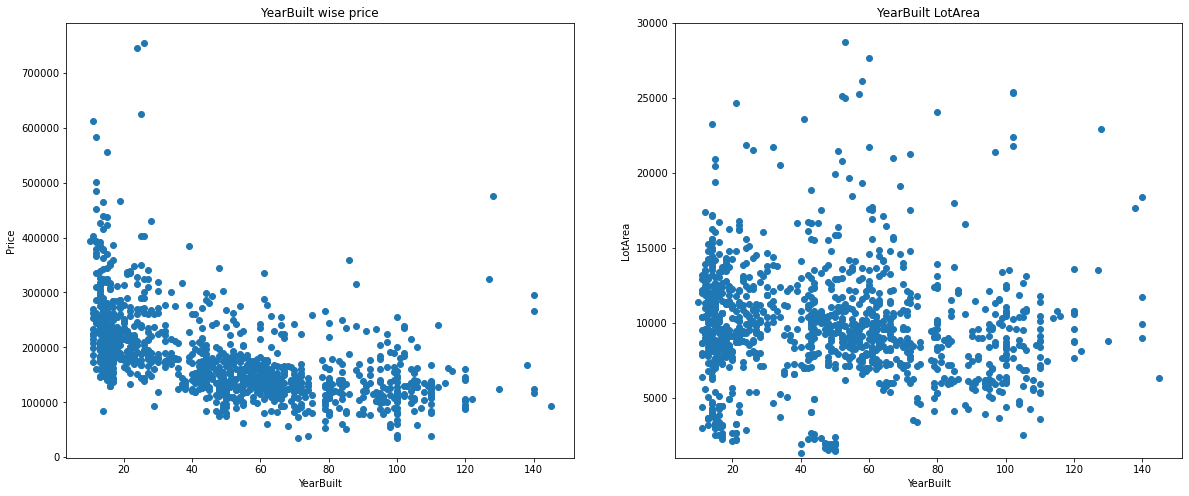

In [88]:
# we are going to see the what is the price of old and new property bases of lot area

# let see how garageArea impact the saleprice
# we are going to check the overall condition and overall quality of the hourse and their prices
plt.figure(figsize =(20,8))
plt.subplot(1,2,1)
plt.scatter(x = EDA_purpose["YearBuilt"], y =EDA_purpose["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("Price ")
plt.title("YearBuilt wise price")

plt.subplot(1,2,2)
plt.scatter(x = EDA_purpose["YearBuilt"], y =EDA_purpose["LotArea"])
plt.xlabel("YearBuilt")
plt.ylabel("LotArea ")
plt.title("YearBuilt LotArea");
plt.ylim(1000,30000); # setting the axis 

majority of the house are 70 years old and their price fall under $400000, we can count that only 6 house and those are below 20 years and their price is between 6.5 to 8 LAKH
majority of the property lot is below or equal to 15000 square feet.

In [89]:
# check the the foundation of the home and some releted component to check the price of the home

EDA_purpose.groupby("Foundation")[["LotArea","YearBuilt","TotalBsmtSF","GarageArea","SalePrice"]].median()

,LotArea,YearBuilt,TotalBsmtSF,GarageArea,SalePrice
Foundation,,,,,
BrkTil,8665.500,98.000,796.000,340.000,128000.000
CBlock,9600.000,57.000,964.000,440.000,141000.000
PConc,9588.000,18.000,1145.000,541.000,206300.000
Slab,8339.000,65.000,0.000,400.000,106500.000
Stone,9042.000,110.000,1020.000,414.000,137000.000
Wood,12134.000,32.000,559.000,492.000,164000.000


LotArea is the total area in which a house is built and TotalBsmtSF and GarageArea are part of the total area. i am checking that wheather foundation plays important role in the pricing or not. poured Concrete is considered one of the best and strong building block for any constrution and we have seen the same from the data also. price are higher for these kind of building foundation. it is also seen that this trend has started recently the average years of this trend is 18 years.

# EDA conclusion

we have seen sale price by relating different component and these conponent impact prices of the property. lotarea is very important parameter in prediction. property with multiple accesses to the road is also impact the price. Foundation of the buildung is also matters in prediction.it has also proved that neighborhood of the property plays important role in the price houses which are built recently and used concrete for builing them, those looks strong and price is also high for those set of homes.

# So we have our training and test data ready after encoding. i am not going to check variance and correaltion among the data set.

In [91]:
# checking variance of numerical values
Numrical_col = df_Train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch',  'MiscVal', 'MoSold',
       'SalePrice']]

Numrical_col_test = df_Test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold']]

In [92]:
Numrical_col.var()

LotFrontage            503.568
LotArea           80235772.750
MasVnrArea           33203.576
BsmtFinSF1          214058.703
BsmtUnfSF           201938.362
TotalBsmtSF         195604.742
1stFlrSF            153007.697
2ndFlrSF            193332.898
LowQualFinSF          2590.082
GrLivArea           278829.365
GarageArea           45995.995
WoodDeckSF           15916.090
OpenPorchSF           4406.440
EnclosedPorch         3993.114
3SsnPorch              846.162
ScreenPorch           3033.896
MiscVal             295136.243
MoSold                   7.216
SalePrice       6257693873.014
dtype: float64

In [93]:
Numrical_col_test.var()

LotFrontage           399.305
LotArea         177706757.182
MasVnrArea          30571.048
BsmtFinSF1         184521.514
BsmtUnfSF          168956.979
TotalBsmtSF        180252.172
1stFlrSF           134646.372
2ndFlrSF           180012.521
LowQualFinSF         1460.732
GrLivArea          264401.052
GarageArea          44430.565
WoodDeckSF          14859.326
OpenPorchSF          4338.257
EnclosedPorch        2692.874
3SsnPorch             914.911
ScreenPorch          3420.317
MiscVal             50192.227
MoSold                  7.698
dtype: float64

In [94]:
df_Test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [96]:
"""Pool Area have 0 variance in test dataset, have checked the same in the training dataset as well and 
found we have maximum values are 0, it has only 6 other values"""

print("number of zero values in the series",df_Train["PoolArea"][df_Train["PoolArea"]==0].count())

# # we have seen that we have 1161 zero values out 1169, we are dropping it. from test and trainig data.
df_Train.drop("PoolArea",axis = 1, inplace = True)
df_Test.drop("PoolArea",axis = 1, inplace = True)

number of zero values in the series 1161


# Checking the correlation of the numerical data with heatmap

<AxesSubplot:>

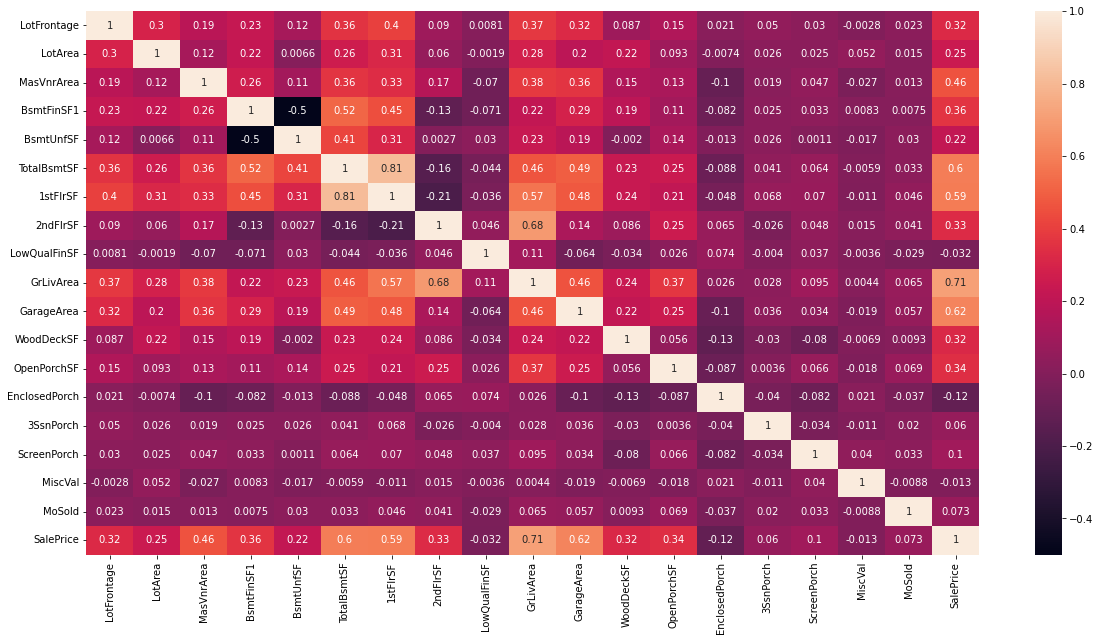

In [97]:
# Checking the correlation of the numerical data with heatmap
plt.figure(figsize=(20,10))
sns.heatmap(Numrical_col.corr(),annot = True)

We can see that a few columns are not contibuting to predict the sales values much, so we can remove them and those columns are Lowqualfinsf,enclosedporch, 3ssnporch, mosold, miscval, screenporch

In [98]:
# Removing cols after correlation check
df_Train.drop(columns = ["EnclosedPorch","LowQualFinSF","3SsnPorch","MoSold","MiscVal","ScreenPorch"],axis = 1, inplace = True)
df_Test.drop(columns = ["EnclosedPorch","LowQualFinSF","3SsnPorch","MoSold","MiscVal","ScreenPorch"],axis = 1, inplace = True)

In [99]:
# Checking the columns name 
Numrical_col.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

In [101]:
# updating the numerical_col variable for further checking the skewness
Numrical_col = df_Train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

Numrical_col_test = df_Test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

# Skewness correction

In [102]:
# created a copy for numerical data to check the skewness
Numrical_col_skew = Numrical_col.copy()
Numrical_col_test_skew = Numrical_col_test.copy()

In [103]:
Numrical_col_skew.skew()

LotFrontage    2.733
LotArea       10.659
MasVnrArea     2.836
BsmtFinSF1     1.872
BsmtUnfSF      0.909
TotalBsmtSF    1.745
1stFlrSF       1.514
2ndFlrSF       0.823
GrLivArea      1.450
GarageArea     0.190
WoodDeckSF     1.505
OpenPorchSF    2.411
dtype: float64

In [104]:
Numrical_col_test_skew.skew()

LotFrontage    0.499
LotArea       12.782
MasVnrArea     1.978
BsmtFinSF1     0.740
BsmtUnfSF      0.961
TotalBsmtSF    0.519
1stFlrSF       0.692
2ndFlrSF       0.766
GrLivArea      1.011
GarageArea     0.134
WoodDeckSF     1.708
OpenPorchSF    2.185
dtype: float64

we see that all the columns are skewed in training and test dataset.i am going to apply cuberoot, sqrt and box cox transformation to correct the skewness

In [106]:
# applying skewness method of training dataset 
for i in Numrical_col_skew.columns:
    df_Train[i] = np.cbrt(df_Train[i])
    
# Training data set 
df_Train["LotArea"] = boxcox(df_Train["LotArea"])[0]
df_Train["MasVnrArea"] = np.sqrt(df_Train["MasVnrArea"]) 

In [107]:
# applying skewness method of test dataset 
for i in Numrical_col_test_skew.columns:
    df_Test[i] = np.cbrt(df_Test[i])
    
# Training data set 
df_Test["LotArea"] = boxcox(df_Test["LotArea"])[0]
df_Test["MasVnrArea"] = np.sqrt(df_Test["MasVnrArea"]) 

i have applied cube root on entire data numeric data and found that except lotarea and MasVnrArea skewness got corrected. have applied boxcox and sqrt on these two col respectively for correct the skewness. now we have data set with removed skewness

# Data is ready for modeling, seprating traning data into X and Y

In [109]:
X = df_Train.iloc[:,:-1] # seprating x and removing target feature from the X 
y = df_Train["SalePrice"] # saving target vriable into y

# transforming the data for scaling purpose 
RB = RobustScaler()
X_RB =  RB.fit_transform(X)

# scallling the test data
X_test_RB = RB.fit_transform(df_Test)


# spliting into training and test for model training
X_train,X_test,y_train,y_test = train_test_split(X_RB,y, test_size =0.2, random_state =60)

In [110]:
#checking the shape of the training and test dataset
print("training data X ",X_train.shape)
print("training data Y",y_train.shape)
print("training_test data X",X_test.shape)
print("training_test data Y",y_test.shape)

training data X  (934, 66)
training data Y (934,)
training_test data X (234, 66)
training_test data Y (234,)


In [111]:
# saving for all the models in a list so that for loop can be applied 
Models = [RandomForestRegressor(),GradientBoostingRegressor(),SVR(),DecisionTreeRegressor(),AdaBoostRegressor(), LinearRegression()]
for model in Models: # running loop for getting result from multiple model and then we will compare all the model
    print(model,"\n")
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print("Mean_squared_error",mean_squared_error(y_test,prediction))
    print("R2_score",r2_score(y_test,prediction))
    print("\n")

RandomForestRegressor() 

Mean_squared_error 610415361.6982483
R2_score 0.891163904490787


GradientBoostingRegressor() 

Mean_squared_error 596778281.2229226
R2_score 0.8935953744147256


SVR() 

Mean_squared_error 5969229708.9304495
R2_score -0.06430423525078632


DecisionTreeRegressor() 

Mean_squared_error 1571342097.8589745
R2_score 0.7198321841632033


AdaBoostRegressor() 

Mean_squared_error 1132160092.307116
R2_score 0.7981376425467991


LinearRegression() 

Mean_squared_error 873944717.6861664
R2_score 0.8441770362737305




I have applied 6 ML models to check which one is working good. out of all the the ML models, GradientBoostingRegressor is working very well on this dataset. its r2_score is and Mean_error are good as compared to other models.further, i am going to use GradientBoostingRegressor model for hyperparameter tuning using gridsearch CV and then we will for for cross validation. once it is done will test out actual test data.

# GridSearch CV

In [ ]:
Parameter = {"loss":["ls", "lad"], "learning_rate" :[0.1,0.2,0.4,0.5,0.7],"n_estimators" :[100,200,300,500],"max_depth":[3,5,7,9],
             "max_features":["auto", "sqrt", "log2"]}


grid_search = GridSearchCV(GradientBoostingRegressor(),param_grid =Parameter , scoring ="r2", n_jobs =-1, cv = 10)

grid_search.fit(X_RB,y)
print("average r2 score",grid_search.best_score_) # this is the average score  of 10 CV.
print("best parameter",grid_search.best_params_) # these are the best parameters

# Cross_val_score

In [ ]:
cross_GBR = GradientBoostingRegressor(max_depth =5,n_estimators=300,loss="ls",max_features ="log2",learning_rate = 0.1)

for i in range(2,11):
    CVS = cross_val_score(cross_GBR,X_RB,y,scoring ="r2", cv = i, n_jobs = -1)
    print("At iteration of ",i,"the average score in",CVS.mean(), "and the SD is ", CVS.std())

on an average, we have found 87+ accuracy on the model. we can see it thorugh above iterations

In [ ]:
# training the data and passing best parameter to the model 
GBR = GradientBoostingRegressor(max_depth =5,n_estimators=300,loss="ls",max_features ="log2",learning_rate = 0.1)
GBR.fit(X_RB,y)

# Predicting the test data and saving it prediction in the prediction column in test data itself.
df_Test["Prediction"] = GBR.predict(X_test_RB) 

In [ ]:
#Extracting the feature importance
Features_importance = GBR.feature_importances_  

# Saving the same into pandas series 
Features_importance["value"] = pd.Series(Features_importance, index = X.columns,)

# Assigning a name to feature.
Features_importance = Features_importance.rename("Value")

In [ ]:
df_Test.head() # checking a few observation of prediction

# Conclusion

we were given training and test csv file separately, training set has 1168 observation with 81 columns including target one. Test file has 80 columns as it doesn't have Target column. I found missing values in couple of columns, some columns missing value percentage was quite high. i took 20% threshold, columns which had 20% or above that missing value those were dropped and less than 20% missing value imputed with mode, median and respective col's value. i have checked categorical columns and found that one column had only one single value in it, have deleted them. have checked outlier as well, in maximum columns majority of values are near to the upper whisker and a few values were far. i have not removed them consider that the nature of property. some lot sizes are small and some are large thus i didn't remove them.all categorical columns are encoded by using cat.codes function. Skewness also get removed from the columns. Features which had high correlated were got deleted. features which were not adding values to the predicting sales were also removed from the data. While modeling the , dataset were scaled and then given to model.GradientBoostingRegressor is working well on the dataset and provide good r2 score and low MSE. i have selected this as final one and did hyper parameter tuning. average r2 score after Gridsearch CV is 88.44. at the last ML algorithm is trained on best parameter and tested on test data.